In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('house_prices.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [27]:
train_numerical = df.select_dtypes(include=['float']).copy()

In [28]:
train_numerical.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [29]:
train_numerical = train_numerical['MasVnrArea']

In [30]:
train_numerical.head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [31]:
target = df['SalePrice']

In [32]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

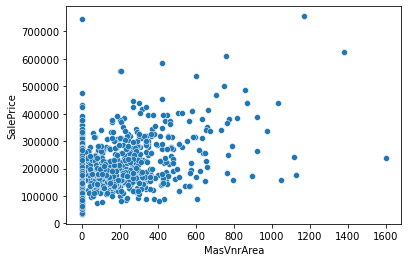

In [34]:
sns.scatterplot(x=train_numerical, y=target);

In [35]:
df_dataset = pd.DataFrame()
df_dataset['x'] = train_numerical
df_dataset['y'] = target

In [49]:
df_dataset['x'] = df_dataset['x'].fillna(df_dataset.x.mean())

In [50]:
df_dataset['x'] = df_dataset['x'].apply(np.int64)

In [51]:
df_dataset.isna().sum()

x    0
y    0
dtype: int64

In [54]:
df_dataset = df_dataset[df_dataset.x != 0]

In [55]:
df_dataset

,x,y
0,196,208500
2,162,223500
4,350,250000
6,186,307000
7,240,200000
...,...,...
1446,189,157900
1447,438,240000
1451,194,287090
1452,80,145000


<AxesSubplot:xlabel='x', ylabel='y'>

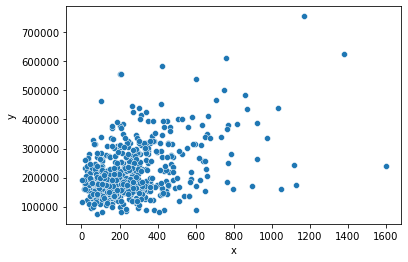

In [58]:
sns.scatterplot(data=df_dataset, x='x', y='y')

In [59]:
df_dataset.to_csv('simple_linear_regression.csv')